Graph


63/63 [==============================] - 0s 1ms/step


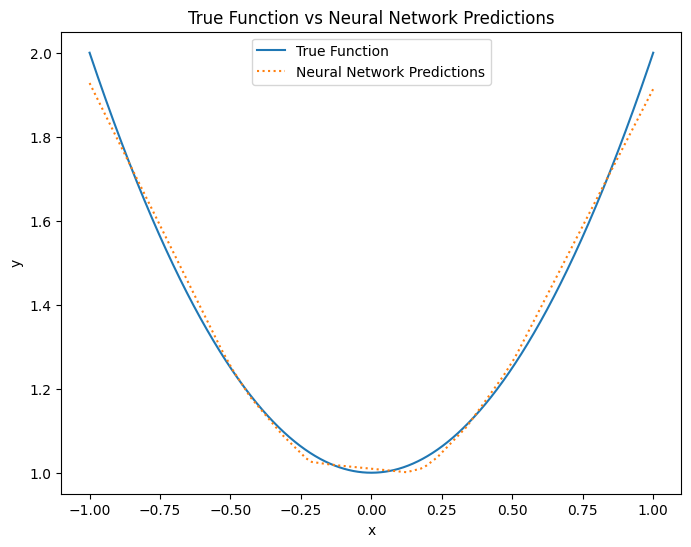

In [23]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-1, 1, 2000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)

# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()


How Under the layers of abstraction , things really work

In [1]:
import numpy as np
import tensorflow as tf

# Define the input data and target output
x = np.array([-0.5])  # Input
y_true = np.array([0.25])  # Target output

# Define the neural network model (no hidden layers, just input and output layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# Print initial weights and biases
print("Initial Weights:")
print(model.get_weights())

# Forward Pass: Compute predicted output
y_pred = model.predict(x)
print("Predicted Output (Before Training):", y_pred)

# Compute Mean Squared Error (MSE) loss before training
loss_before_training = tf.keras.losses.mean_squared_error(y_true, y_pred).numpy()
print("Mean Squared Error (Before Training):", loss_before_training)

# Backward Pass: Compute gradients and update weights using Gradient Descent
with tf.GradientTape() as tape:
    y_pred = model(x)  # Forward pass
    loss = tf.keras.losses.mean_squared_error(y_true, y_pred)  # Compute loss

gradients = tape.gradient(loss, model.trainable_variables)  # Compute gradients
learning_rate = 0.1  # Learning rate for gradient descent

# Update weights and biases using gradient descent
updated_weights = []
for param, grad in zip(model.get_weights(), gradients):
    updated_param = param - learning_rate * grad
    updated_weights.append(updated_param)

model.set_weights(updated_weights)  # Set updated weights to the model

# Print updated weights and biases
print("Updated Weights:")
print(model.get_weights())

# Forward Pass: Compute predicted output after one iteration of training
y_pred = model.predict(x)
print("Predicted Output (After Training):", y_pred)

# Compute Mean Squared Error (MSE) loss after one iteration of training
loss_after_training = tf.keras.losses.mean_squared_error(y_true, y_pred).numpy()
print("Mean Squared Error (After Training):", loss_after_training)


Initial Weights:
[array([[-1.5462875]], dtype=float32), array([0.], dtype=float32)]
1/1 [==============================] - 0s 194ms/step
Predicted Output (Before Training): [[0.77314377]]
Mean Squared Error (Before Training): [0.2736794]
Updated Weights:
[array([[-1.4939731]], dtype=float32), array([-0.10462876], dtype=float32)]
1/1 [==============================] - 0s 24ms/step
Predicted Output (After Training): [[0.6423578]]
Mean Squared Error (After Training): [0.15394467]


In [14]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def trueEqn(x):
    return x**2 +1


def custom_loss(y_true, y_pred, x_train):
    with tf.GradientTape() as tape:
        tape.watch(tf.constant(x_train))
        y_pred_with_gradient = tape.gradient(y_pred, x_train)
    dy_dx = y_pred_with_gradient - 2 * x_train
    
    # Calculate y_0 using the model's prediction at x=0
    x_0 = tf.constant([0.0], dtype=tf.float32)
    y_0 = model(x_0)  # Assuming 'model' is your neural network model
    
    loss = (dy_dx ** 2) + ((y_0 - 1) ** 2)
    return loss

    
# Creating the data from -1 to 1 and corresponding y values
x_data = np.linspace(-1,1,2000)
y_data = trueEqn(x_data)

x_train ,x_test , y_train, y_test = train_test_split(x_data, y_data,test_size = 0.25,random_state = 42)

model = Sequential()
model.add(  Dense(units = 32, activation= 'relu', input_shape=(1,)))
model.add(Dense(units =1))

model.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, x_train))
model.summary()
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))





Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                64        
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


AttributeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_32/2454830006.py", line 36, in None  *
        lambda y_true, y_pred: custom_loss(y_true, y_pred, x_train)
    File "/tmp/ipykernel_32/2685557017.py", line 15, in custom_loss  *
        y_pred_with_gradient = tape.gradient(y_pred, x_train)

    AttributeError: 'numpy.ndarray' object has no attribute '_id'


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**2 + 1

x_data = np.linspace(-10, 10, 5000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) 
    correct_slope = 2*(x_train_tf)
    y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
    loss = ((dy_dx - correct_slope) ** 2) + ((y_0 - 1) ** 2) 
    sum_loss= tf.reduce_mean(loss)
    return loss
    

model = Sequential()
model.add(Dense(units=32, activation='softplus', input_shape=(1,)))
# model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss=custom_loss)
model.summary()
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
118/118 [==============================] - 1s 5ms/step - loss: 120.7256 - val_loss: 113.3465
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 103.4671 - val_loss: 91.6638
Epoch 3/50
118/118 [==============================] - 0s 4ms/step - loss: 78.2709 - val_loss: 64.3548
Epoch 4/50
118/118 [==============================] - 1s 5ms/step - loss: 52.1368 - val_loss: 40.7476
Epoch 5/50
118/118 [=======================

625/625 [==============================] - 1s 1ms/step


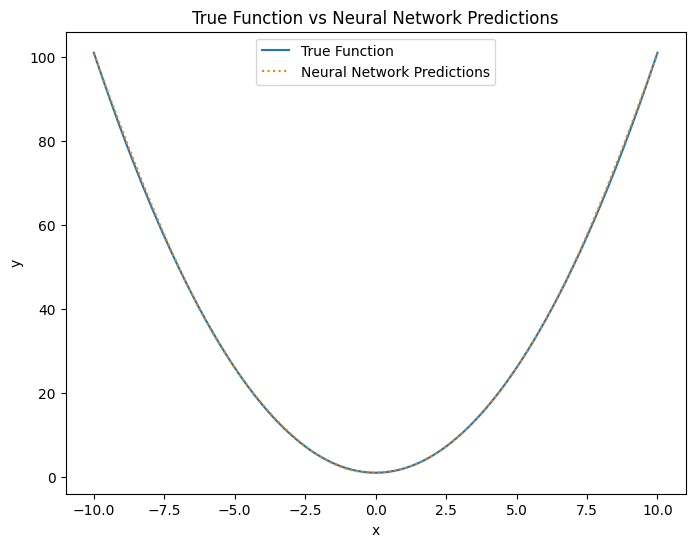

In [4]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-10, 10, 20000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)


# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()

In [32]:
print(x_train_tf)
print(x_train-x_train_tf.numpy())
print(dy_dx)

tf.Tensor(
[ 0.7388694  -0.45172587 -0.06353176 ... -0.13956979  0.45972985
  0.12656328], shape=(1500,), dtype=float32)
[ 6.08271500e-09  7.43939910e-09 -2.03129891e-09 ...  4.27877256e-09
  1.46402603e-08  8.19973867e-10]


NameError: name 'dy_dx' is not defined

In [70]:


with tf.GradientTape() as tape:
    tape.watch(x_train_tf)
    y_pred_with_gradient = model(x_train_tf)
dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) - 2 * x_train_tf
y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
print("y at 0 is " ,y_0)
loss = (dy_dx ** 2) 
sum_loss= tf.reduce_mean(loss)
print(sum_loss)
print(loss)
print(dy_dx)

y at 0 is  tf.Tensor([[1.1389787]], shape=(1, 1), dtype=float32)
tf.Tensor(1359.2212, shape=(), dtype=float32)
tf.Tensor([0.26147753 0.04346903 0.10300066 ... 0.7558473  0.09068233 0.15302555], shape=(3750,), dtype=float32)
tf.Tensor(
[-0.5113487   0.20849228  0.32093716 ...  0.8693948   0.30113506
 -0.3911848 ], shape=(3750,), dtype=float32)


What is in my cost function which rewards the function to not be non linear?

In [66]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**2 + 1

x_data = np.linspace(-10, 10, 5000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) - (2 * x_train_tf)
    y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
    loss = (dy_dx ** 2)
    sum_loss= tf.reduce_sum(loss)
    return sum_loss
    

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(1,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train, epochs=70, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 32)                64        
                                                                 
 dense_82 (Dense)            (None, 64)                2112      
                                                                 
 dense_83 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
118/118 [==============================] - 2s 5ms/step - loss: 1228.8247 - val_loss: 288.0361
Epoch 2/70
118/118 [==============================] - 0s 3ms/step - loss: 152.3287 - val_loss: 139.8719
Epoch 3/70
118/118 [==============================] - 0s 3ms/step - loss: 123.1593 - val_loss: 121.5346
Ep

625/625 [==============================] - 1s 2ms/step


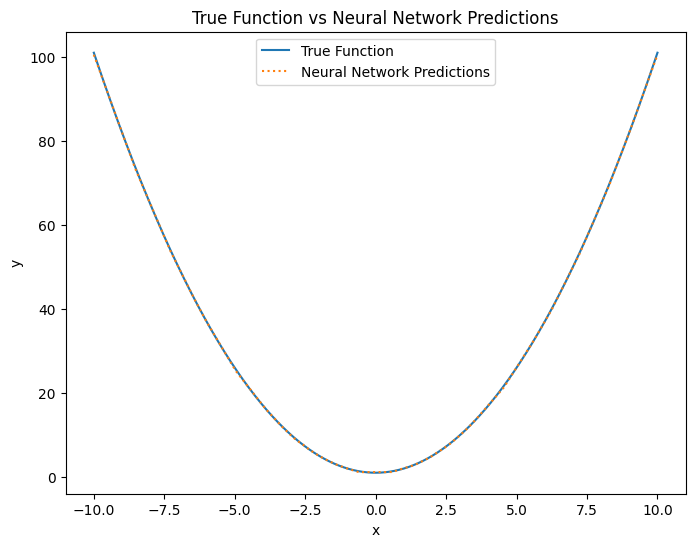

In [67]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-10, 10, 20000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)


# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**2 + 1

x_data = np.linspace(-10, 10, 5000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = y_pred
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) - (2 * x_train_tf)
    y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
    loss = (dy_dx ** 2)+ (y_0 -1)**2
    sum_loss= tf.reduce_sum(loss)
    return sum_loss
    

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(1,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train, epochs=70, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
118/118 [==============================] - 1s 3ms/step - loss: 1264.6195 - val_loss: 578.7356
Epoch 2/70
118/118 [==============================] - 0s 2ms/step - loss: 246.1925 - val_loss: 148.9876
Epoch 3/70
118/118 [==============================] - 0s 2ms/step - loss: 130.3894 - val_loss: 129.1117
Epo

KeyboardInterrupt: 

Checking the working of GradientTape

In [12]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**2 + 1

x_data = np.linspace(-10, 10, 5000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)
with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
dydx = tape.gradient(y_pred_with_gradient, x_train_tf)
actual = 2* x_train_tf
print(dydx)
print(2*x_train_tf)
print(dydx- 2*x_train_tf)

tf.Tensor([ 9.966038  9.966038 -9.860386 ...  9.966038  9.966038 -9.860386], shape=(3750,), dtype=float32)
tf.Tensor([ 19.079817   5.309062 -16.079216 ...   4.740948  10.182036 -13.118624], shape=(3750,), dtype=float32)
tf.Tensor(
[-9.113779    4.6569757   6.21883    ...  5.2250896  -0.21599865
  3.2582378 ], shape=(3750,), dtype=float32)


In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**2 + 1

x_data = np.linspace(-10, 10, 5000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) 
    correct_slope = 2*(x_train_tf)
    y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
    loss = ((dy_dx - correct_slope) ** 2) + ((y_0 - 1) ** 2) 
    sum_loss= tf.reduce_mean(loss)
    return loss
    

model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(1,)))
# model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss=custom_loss)
model.summary()
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                64        
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
118/118 [==============================] - 1s 6ms/step - loss: 131.5837 - val_loss: 131.2036
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 131.0297 - val_loss: 130.8454
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 130.6287 - val_loss: 130.3721
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 130.0385 - val_loss: 129.6411
Epoch 5/100
118/118 [=============

625/625 [==============================] - 1s 1ms/step


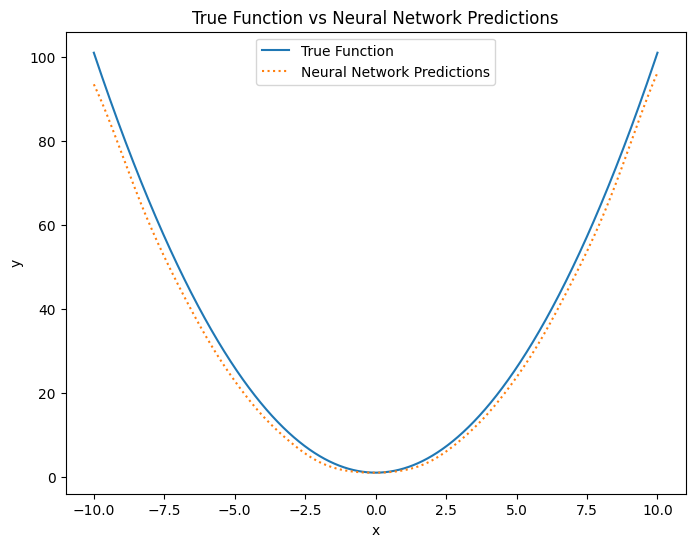

In [10]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-10, 10, 20000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)


# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                64        
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
118/118 [==============================] - 1s 6ms/step - loss: 132.0082 - val_loss: 131.4559
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 130.5943 - val_loss: 129.4188
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 127.6232 - val_loss: 125.4941
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 123.1655 - val_loss: 120.6627
Epoch 5/100
118/118 [=============

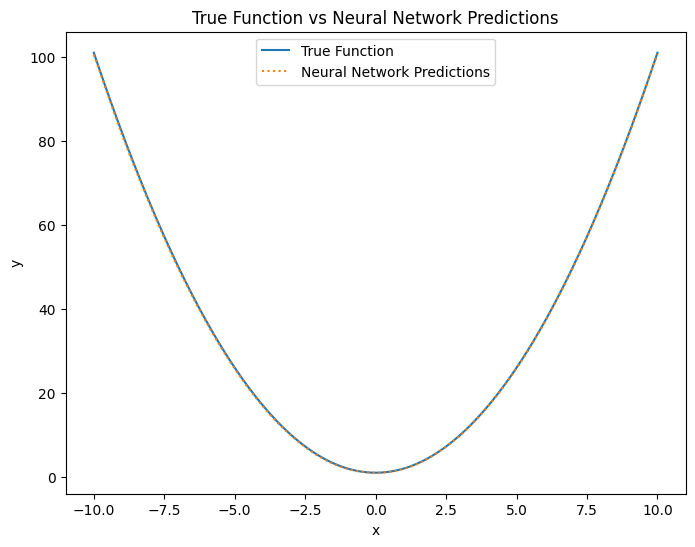

In [14]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**2 + 1

x_data = np.linspace(-10, 10, 5000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) 
    correct_slope = 2*(x_train_tf)
    y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
    loss = ((dy_dx - correct_slope) ** 2) + ((y_0 - 1) ** 2) 
    sum_loss= tf.reduce_mean(loss)
    return loss

model = Sequential()
model.add(Dense(units=32, activation='tanh', input_shape=(1,)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss=custom_loss)
model.summary()
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-10, 10, 20000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)


# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()

Changing the function now

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                64        
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
24/24 [==============================] - 1s 13ms/step - loss: 40.7327 - val_loss: 40.5675
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 40.5039 - val_loss: 40.4450
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 40.3958 - val_loss: 40.3396
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 40.2906 - val_loss: 40.2348
Epoch 5/200
24/24 [=============================

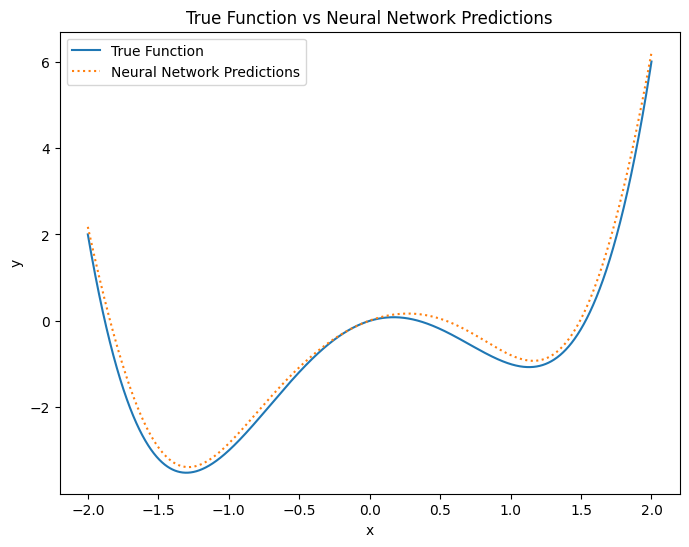

In [25]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**4- (3*(x**2)) + x

def diff(x):
    return 4*(x**3)- (6*x)+1

x_data = np.linspace(-2, 2, 1000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) 
    correct_slope = diff(x_train_tf)
    y_0 = model(tf.constant([0.0], dtype=tf.float32))  # Prediction of the model at x=0
    loss = ((dy_dx - correct_slope) ** 2) + ((y_0) ** 2) 
    sum_loss= tf.reduce_mean(loss)
    return loss

model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(1,)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss=custom_loss)
model.summary()
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))


import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-2, 2, 20000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)


# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                64        
                                                                 
 dense_49 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/270
24/24 [==============================] - 1s 11ms/step - loss: 46.3588 - val_loss: 45.0961
Epoch 2/270
24/24 [==============================] - 0s 4ms/step - loss: 44.1791 - val_loss: 43.2463
Epoch 3/270
24/24 [==============================] - 0s 4ms/step - loss: 42.6019 - val_loss: 41.9602
Epoch 4/270
24/24 [==============================] - 0s 4ms/step - loss: 41.5339 - val_loss: 41.1175
Epoch 5/270
24/24 [=============================

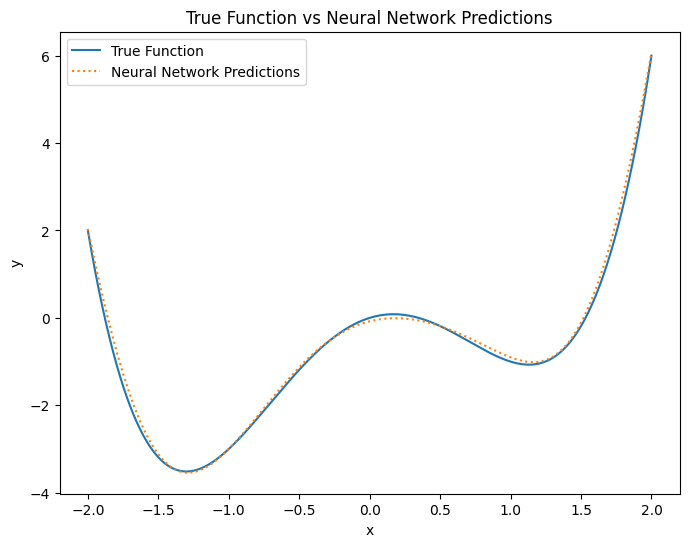

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def trueEqn(x):
    return x**4- (3*(x**2)) + x

def diff(x):
    return 4*(x**3)- (6*x)+1

x_data = np.linspace(-2, 2, 1000)
y_data = trueEqn(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

# Create a TensorFlow constant for x_train
x_train_tf = tf.constant(x_train, dtype=tf.float32)

def custom_loss(y_true, y_pred):
    with tf.GradientTape() as tape:
        tape.watch(x_train_tf)
        y_pred_with_gradient = model(x_train_tf)
    dy_dx = tape.gradient(y_pred_with_gradient, x_train_tf) 
    correct_slope = diff(x_train_tf)
    y_0 = model(tf.constant([-1], dtype=tf.float32))  # Prediction of the model at x=0
    loss = ((dy_dx - correct_slope) ** 2) + ((y_0 +3) ** 2) 
    sum_loss= tf.reduce_mean(loss)
    return loss

model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(1,)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss=custom_loss)
model.summary()
model.fit(x_train, y_train, epochs=270, batch_size=32, validation_data=(x_test, y_test))


import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(-2, 2, 20000)

# Calculate true y values using the trueEqn function
true_y_values = trueEqn(x_values)

# Predict y values using the trained neural network
predicted_y_values = model.predict(x_values)


# Plotting the true function and neural network predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, true_y_values, label='True Function')
plt.plot(x_values, predicted_y_values, label='Neural Network Predictions', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Neural Network Predictions')
plt.legend()
plt.show()

Run for 270 epochs